In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize
# from scipy import optimize

import glob

# # import lsqfit
# from lib import Jackknife
# from lib import simple_mean
# from lib import format_print

# plt.rcParams['figure.dpi'] = 300

In [2]:
class Jackknife:
    def __init__( self, len_data, binsize ):
        self.binsize = binsize
        self.nbins = math.floor( len_data/self.binsize )
        self.N = self.binsize * self.nbins
        self.jack_avg = []
        self.est = 0
        self.var_est = 0

    def set( self, func, list_of_data ):
        for i in range( self.nbins ):
            self.jack_avg.append( func( i, self.binsize, list_of_data ) )

    def do_it( self ):
        for i in range( 0, self.nbins ):
            self.est += self.jack_avg[i]
        self.est /= self.nbins

        for i in range( 0, self.nbins ):
            self.var_est += ( self.jack_avg[i] - self.est )**2
        self.var_est /= self.nbins
        self.var_est *= self.nbins -1

    def mean( self ):
        return self.est

    def var( self ):
        return self.var_est

    def err( self ):
        return np.sqrt(self.var_est)

def simple_mean(i, binsize, np_data):
    resmpld = np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
    return np.mean(resmpld, axis=0)

def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

def format_print_w_exact(exact, cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'+': '+'{num:.{width}f}'.format(num=(exact-cen)/err, width=i+1)+' sigma'

In [3]:
res_list=[]

binsize=10

In [4]:
path="./beta50.000000at0.036934nt64L2ratio0.500000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [5]:
path="./beta50.000000at0.073868nt64L2ratio1.000000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [6]:
path="./beta50.000000at0.069197nt64L1ratio0.500000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [7]:
path="./beta50.000000at0.138394nt64L1ratio1.000000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [8]:
res_list

[['./beta50.000000at0.036934nt64L2ratio0.500000/',
  array([ 4.86771114e-01,  3.46946227e-01,  2.59896410e-01,  1.93707214e-01,
          1.49153456e-01,  1.06965186e-01,  8.26697990e-02,  6.88964743e-02,
          4.61758880e-02,  4.07739539e-02,  2.90276098e-02,  2.84291436e-02,
          1.38954718e-02,  2.02936526e-02,  1.25545011e-02,  9.59291493e-03,
          8.54096787e-03,  9.27254362e-03,  7.77013011e-03,  3.91412059e-04,
          1.06816659e-02,  1.66386290e-03,  5.58491286e-03,  2.73019696e-04,
          7.66901143e-03, -4.85800496e-04,  2.49726556e-03,  4.52491412e-03,
          5.01066086e-05,  3.15297205e-03,  1.67948072e-04,  6.11768931e-03,
         -3.49465162e-03,  6.11768931e-03,  1.67948072e-04,  3.15297205e-03,
          5.01066086e-05,  4.52491412e-03,  2.49726556e-03, -4.85800496e-04,
          7.66901143e-03,  2.73019696e-04,  5.58491286e-03,  1.66386290e-03,
          1.06816659e-02,  3.91412059e-04,  7.77013011e-03,  9.27254362e-03,
          8.54096787e-03,

In [19]:
def f(t, nmax):
    res = 0.0
    for n in range(1,nmax):
        res += np.sqrt( n*(n+1.0) ) * (2.0*n+1.0) * np.exp( -np.sqrt( n*(n+1.0) )*t )
    return res/(8.0*np.pi)

In [20]:
Nt

64

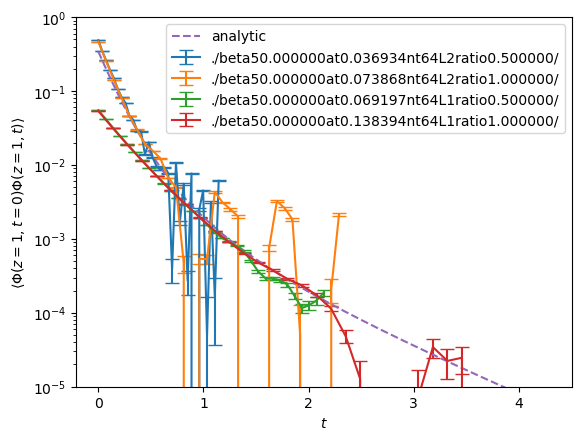

In [30]:
plt.yscale("log")

for res in res_list:
    Nt = res[1].shape[0]

    at = float(res[0].split("at")[1].split("nt")[0])
    xx=np.arange(int(Nt/2)) * at
    # xx=np.arange(Nt)
    yy=res[1][:int(Nt/2)]
    dy=res[2][:int(Nt/2)]

    plt.errorbar( xx, yy, dy, capsize=5, label=res[0] )

# xx=np.arange(Nt)
# yy= 0.07*np.exp( -np.sqrt(2.0) * xx / 8.0 )
# plt.plot( xx, yy )

xx=np.linspace(0, 4.0, 200)
# yy= 0.02*np.exp( -np.sqrt(2.0) * xx * 2.4 )
yy= 0.013*f(xx, 10)
plt.plot( xx, yy, ls="dashed", label="analytic" )

plt.legend()
plt.ylim( 1.0e-5, 1.0e0 )
plt.xlabel("$t$")
plt.ylabel("$\\langle \\Phi(z=1,t=0) \\Phi(z=1,t) \\rangle$")

plt.savefig("gaugecorr.pdf")

In [9]:
50.0/8.0

6.25